In [49]:
import pandas as pd
import numpy as np

In [50]:
data = pd.read_csv('/content/appl5 - Sheet1.csv')
print(data.head())

         Date Closed/Last    Volume     Open     High      Low
0  10/03/2023     $172.40  49594610  $172.26  $173.63  $170.82
1  10/02/2023     $173.75  52164540  $171.22  $174.30  $170.93
2  09/29/2023     $171.21  51861080  $172.02  $173.07  $170.34
3  09/28/2023     $170.69  56294420  $169.34  $172.03  $167.62
4  09/27/2023     $170.43  66921810  $172.62  $173.04  $169.05


Mean Squared Error (MSE): 0.19122670014718898
R-squared (R2) Score: 0.9998729782925206


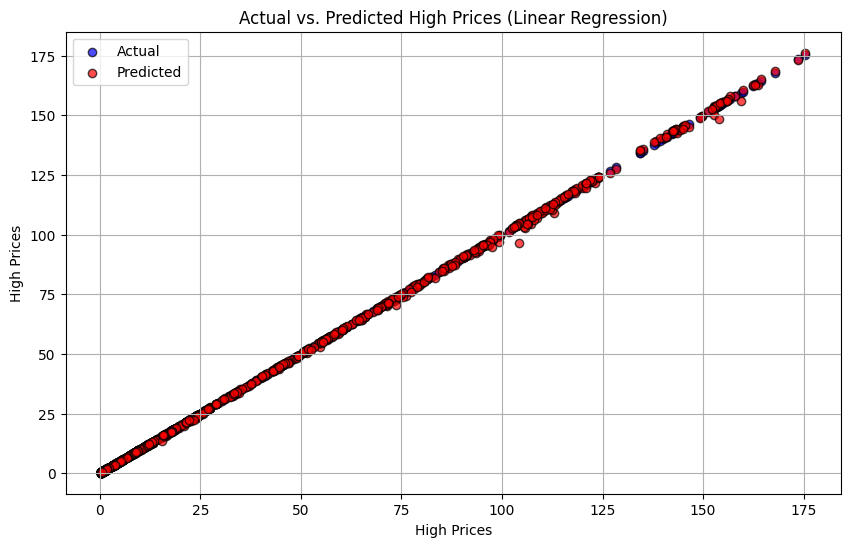

In [63]:
#LINEAR REGRESSION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load and preprocess the dataset from the CSV file with a specific index column
txt_file_path = '/content/aapl.us - Sheet1.csv'
data_df = pd.read_csv(txt_file_path, index_col='Volume')

# to predict the 'High' price.
# For simplicity, let's use 'Low' and 'Close' as features.
X = data_df[['Low', 'Close']]
y = data_df['High']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle Missing Values
# Create an imputer and fit-transform X_train
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

# Visualization
plt.figure(figsize=(10, 6))

# Plot actual values in blue
plt.scatter(y_test, y_test, c='blue', label='Actual', alpha=0.7, edgecolors='k')

# Plot predicted values in red
plt.scatter(y_test, y_pred, c='red', label='Predicted', alpha=0.7, edgecolors='k')

plt.xlabel("High Prices")
plt.ylabel("High Prices")
plt.title("Actual vs. Predicted High Prices (Linear Regression)")

plt.legend()
plt.grid(True)
plt.show()


In [45]:
# Predict the High prices for the following year (2018)
# Assuming 'Date' column is in date format
# Extract the year from the 'Date' column and filter data for 2018
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df['Year'] = data_df['Date'].dt.year

# Filter data for the year 2017
data_2017 = data_df[data_df['Year'] == 2017]

# Extract 'Low' and 'Close' as features for 2018
X_2017 = data_2017[['Low', 'Close']].values

# Predict High prices for 2018
y_high_2017 = model.predict(X_2017)

# Print the predicted High prices for 2018
print("Predicted High Prices for 2018:")
print(y_high_2017)


Predicted High Prices for 2018:
[115.08816507 115.33693843 115.74959538 116.82605195 118.03045319
 118.23169697 118.75487318 118.29647491 118.35098045 118.79401357
 119.2772623  119.02852596 119.29403261 119.3649624  119.19371976
 120.71981039 121.19711329 121.20388322 120.67723352 120.48111145
 127.49960018 127.61754448 128.10302248 129.1587572  130.4846052
 131.07988137 131.86959437 131.98327808 132.98849582 134.30605766
 135.09113503 135.05281875 135.38664283 136.33667095 136.65757324
 136.307943   136.076249   136.59238325 136.76967473 138.93829103
 138.7698378  139.26153366 138.96699001 139.15218457 138.8169183
 138.01692486 138.8516951  138.95231699 138.81681529 139.85168811
 140.41074529 139.81684532 140.92202985 139.67883427 140.7449444
 140.68312489 140.40689676 140.00268694 142.61588962 143.67922642
 143.65393494 143.30780716 143.34822074 144.1058353  143.81820162
 143.45447941 143.17783923 142.93941232 140.98044991 141.41221752
 140.91780629 141.38585888 141.03935606 140.467